Farzaneh Zohrabi
First Assignment

# Assignment 1: Python coding practice

You do not need to master python coding to do well in this course, but you do need to learn enough to get by. This assignment aims to reinforce some of the key aspects of the python language that you will use regularly throughout the course.

Before trying to complete the assignment, work through each of the sections listed under "Learn the Basics" at [learnpython.org](https://www.learnpython.org/). If you would find a video lecture helpful, the LSU's High Performance Computing center offers training in various aspects of computing, including python. You can find a recording of their "Introduction to Python" course on their [training archive](http://www.hpc.lsu.edu/training/archive/tutorials.php), as well as a link to interactive "slides" that can be used in a similar way to learnpython.org.

## Part A: Variables, printing, and control structures

1. Write a piece of code to solve the following quadratic equation for $x$:
$$
2.5 x^2 - 17.5 x - 20.0 = 0
$$
using the quadratic formula. Use **variables** to store the coefficients, and **print** the solution(s) as part of a single sentence using **string formatting**. Use **comments** to explain what you are doing. You can find basic mathematical functions in the `math` or `numpy` **modules**.
Once you are done, run the code, either by pressing the "play" button above, or typing Shift+Enter.

In [7]:
#imports
import numpy as np
import matplotlib.pyplot as plt #import pyplot and rename it plt for short
from scipy.optimize import curve_fit
from scipy.optimize import minimize


In [8]:
a = 2.5
b = -17.5
c = -20.0
delta = b**2 - 4*a*c
r1 = (- b + np.sqrt(delta))/(2 * a)
r2 = (- b - np.sqrt(delta))/(2 * a)

print("First root is equal to"  , r1 , " and the second root is" , r2)

First root is equal to 8.0  and the second root is -1.0


2. Try adjusting one or more of the coefficients and run the cell again. Make some notes about what you find in the following markup cell. E.g., First try making some small adjustments to the coefficient values, then try picking coefficients that will give you a complex solution (i.e., where $b^2-4ac<0$).

a = 3.0
b = 4.5
c = 7.5
delta = b**2 - 4*a*c
if delta < 0: 
    print("imaginary")

When the coefficients change, it give the error of ( invalid value encountered in sqrt
  r1 = (- b + np.sqrt(delta))/(2 * a)) because the solution is a complex number

3. Reset the coefficients to their original values and rerun the cell above. Below, write a **function** to evaluate a general quadratic equation ($y=ax^2+bx+c$), and use this function to check that your solution to the quadratic with the original coefficients is correct. The function should have four arguments: x and the three coefficients. Use an `if` **conditional statement** to print a success or failure message, depending on the result. Again, use **comments** throughout.

In [9]:
a = 2.5
b = -17.5
c = -20.0
delta = b**2 - 4*a*c
def quadratic_eq(x, a, b, c):
    return a*x**2 + b*x + c
def quad(a,b,c):
    if delta<0 :
        print("The root is an imaginary number")
    else:
        r1 = (- b + np.sqrt(delta))/(2 * a)
        r2 = (- b - np.sqrt(delta))/(2 * a)
        
        print("First root is real and equal to"  , r1 , " and the second root is real and" , r2)

#quadratic_eq(a, b, c)
quad(a,b,c)

First root is real and equal to 8.0  and the second root is real and -1.0


4. Try running both cells again after changing the values of the coefficients by small amounts relative to the original values. Make some notes in the markup cell below on whether your code performed differently for different inputs relative to the original coefficient values. Think about what changes you could make to the code to get more reliable performance from it.

I just used if condition to to make sure the code won't break because of complex solutions.

# Part B: Plotting, NumPy, files, and basic polynomial fitting

Plotting is going to be essential in the course, so you might as well learn the basics now. The standard python plotting language is called `matplotlib`, and it is easiest to use through its sub-package `pyplot`, which gives you an interface that behaves similarly to Matlab. The [pyplot tutorial](https://matplotlib.org/stable/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py) gives you an introduction to many of the things you might want to do with `pyplot`, but for now we'll make the simplest possible plot. I've put in the outline of the plotting commands below, but you'll need to supply the data to plot. There are many ways to do this, but for now, please write code that meets the following requirements.

1. Create a **list** with a series of x values between -6 and 10 that you enter by hand. Create an **empty list** to store the y values. Use a **loop** to **append** a y value to the list for each x value, with the y value computed using the **function** you wrote earlier. This way of doing things may be familiar to you if you've written C or C++ code previously.

[-6, -4, -3, 9, -1, 6, 8, 3, 1, 4] [175.0, 90.0, 55.0, 25.0, 0.0, -35.0, 0.0, -50.0, -35.0, -50.0]


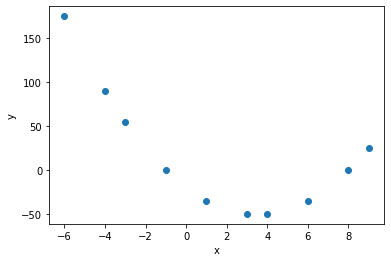

In [10]:
import matplotlib.pyplot as plt #import pyplot and rename it plt for short

#Insert code here to produce the lists of x and y values needed by the plot commands below
xlist = [-6,-4,-3, 9, -1, 6, 8,3,1, 4] #choose random numbers
ylist= []
for i in range(len(xlist)):
    x = xlist[i]
    y = quadratic_eq(x, a, b, c)
    ylist.append(y)

print(xlist, ylist)
    
    
plt.figure() #set up a figure
plt.plot(xlist,ylist, 'o') #issue the plot command
plt.xlabel('x') #Set the axis labels
plt.ylabel('y')
plt.show() #Show the plot

[-6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9] [175.0, 130.0, 90.0, 55.0, 25.0, 0.0, -20.0, -35.0, -45.0, -50.0, -50.0, -45.0, -35.0, -20.0, 0.0, 25.0]


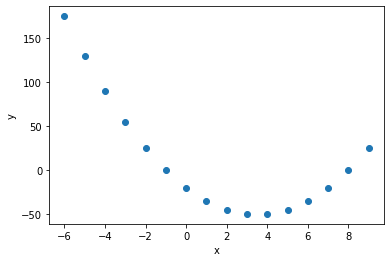

In [11]:
ylist = []
xlist = []
for i in range(-6,10):
    #x = xlist[i]
    y = quadratic_eq(i, a, b, c)
    xlist.append(i)
    ylist.append(y)

print(xlist, ylist)
    
    
plt.figure() #set up a figure
plt.plot(xlist,ylist, 'o') #issue the plot command
plt.xlabel('x') #Set the axis labels
plt.ylabel('y')
plt.show() #Show the plot

Numpy is a package built for performing efficient numerical calculations in python. Python loops are quite inefficient, and loops are common in a lot of numerical calculations. Numpy allows you to perform loops implicitly on list-like objects called arrays. Arrays can have one or more dimensions - a 1-d array is like a list, a 2-d array is like a table or matrix; more dimensions are possible. You can read more about numpy under the Data Science Tutorials heading on learnpython.org.

2. Repeat the task of generating the data to plot in the previous cell using **numpy arrays** an **implcit loop**, this time aiming to achieve higher resolution in the plot. You might find the numpy function `linspace` helpful. You can get help on most functions by using the help function, e.g., `help(numpy.linspace)`. Once the data is generated, plot it.

In [2]:
import numpy as np
help(np.linspace)


Help on function linspace in module numpy:

linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)
    Return evenly spaced numbers over a specified interval.
    
    Returns `num` evenly spaced samples, calculated over the
    interval [`start`, `stop`].
    
    The endpoint of the interval can optionally be excluded.
    
    .. versionchanged:: 1.16.0
        Non-scalar `start` and `stop` are now supported.
    
    .. versionchanged:: 1.20.0
        Values are rounded towards ``-inf`` instead of ``0`` when an
        integer ``dtype`` is specified. The old behavior can
        still be obtained with ``np.linspace(start, stop, num).astype(int)``
    
    Parameters
    ----------
    start : array_like
        The starting value of the sequence.
    stop : array_like
        The end value of the sequence, unless `endpoint` is set to False.
        In that case, the sequence consists of all but the last of ``num + 1``
        evenly spaced samples, so that 

[-6.         -5.15789474 -4.31578947 -3.47368421 -2.63157895 -1.78947368
 -0.94736842 -0.10526316  0.73684211  1.57894737  2.42105263  3.26315789
  4.10526316  4.94736842  5.78947368  6.63157895  7.47368421  8.31578947
  9.15789474 10.        ] [175.0, 136.77285318559558, 102.09141274238227, 70.95567867036011, 43.36565096952909, 19.321329639889207, -1.177285318559548, -18.13019390581717, -31.537396121883653, -41.398891966758995, -47.71468144044321, -50.48476454293629, -49.709141274238235, -45.38781163434904, -37.520775623268705, -26.10803324099723, -11.14958448753464, 7.354570637119082, 29.40443213296396, 55.0]


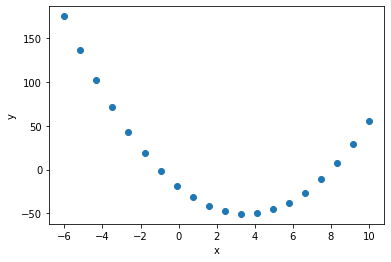

In [12]:
ylist = []
xlist = np.linspace(-6, 10, 20, endpoint=True)
for i in range(len(xlist)):
    x = xlist[i]
    y = quadratic_eq(x, a, b, c)
    #xlist.append(i)
    ylist.append(y)

print(xlist, ylist)
    
    
plt.figure() #set up a figure
plt.plot(xlist,ylist, 'o') #issue the plot command
plt.xlabel('x') #Set the axis labels
plt.ylabel('y')
plt.show() #Show the plot

To focus the telescope we will take measurements of the size of stars at different focus positions and search for the focus position that gives the minimum sized star. The size of the star as a function of focus position is well approximated by a quadratic, so an efficient method of finding the focus is to take a few measurements, fit a quadratic function, and then find its minimum. Here is a table of focus measurements taken previously:

|Focus position|Star size (pixels)|
|--------------|------------------|
|-40|4.85|
|-20|3.71|
|0|2.56|
|20|2.51|
|40|3.17|

Create a new CSV (comma separated variable) file by going to the File menu above, clicking "New Launcher," then selecting the "CSV file" app - it will open up a spreadsheet. Add a column and 5 rows, then copy in the values from the table above into the csv file. Save it with a sensible filename (e.g., focus.csv). 

3. Write code to **load the csv file** into a numpy array using the numpy `loadtxt` function using the optional arguments `skiprows=1,delimiter=','`. Plot the focus data using **stride array indexing** to access the individual columns from the csv file (now a 2-d array). You'll want to use a point style formatting for the data points, rather than a line. Don't forget axis labels.



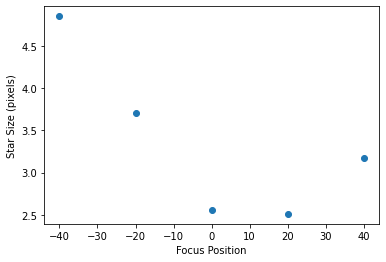

In [9]:
focus = np.loadtxt("focus.csv", skiprows=1,delimiter=',')
plt.figure()
plt.plot(focus[:,0], focus[:,1], 'o') 
plt.xlabel('Focus Position') 
plt.ylabel('Star Size (pixels)')
plt.show()

The points you plotted should look roughly quadratic, so lets fit for the best fit our quadratic function to the data. The `curve_fit` function in the `scipy.optimize` package is very easy to use, and has an example of its use at the bottom of its [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html).

4. Fit a quadratic **function** to the focus data and **plot** the resulting model as a line in addition to plotting the data on the same plot. **Find the minimum** of the best fit quadratic curve, either analytically or numerically, and **print** the focus value and star size at the minimum. 

In [12]:
xlist = focus[:,0]
ylist = focus[:,1]
rangex = np.arange(-50, 50)
popt,pcov = curve_fit(quadratic_eq, xlist, ylist)
fit = quadratic_eq(rangex, *popt) 

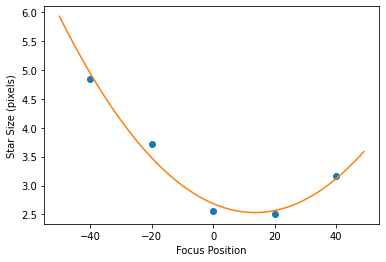

In [13]:
plt.figure() 
plt.plot(xlist, ylist, "o") 
plt.plot(rangex, fit)
plt.xlabel('Focus Position') 
plt.ylabel('Star Size (pixels)')
plt.show() 

In [16]:
minimum = scipy.optimize.minimize(lambda rangex: quadratic_eq(rangex, *popt), 0)
print(minimum)

      fun: 2.533725471559664
 hess_inv: array([[595.74386454]])
      jac: array([-2.98023224e-08])
  message: 'Optimization terminated successfully.'
     nfev: 14
      nit: 3
     njev: 7
   status: 0
  success: True
        x: array([13.58296112])


In [19]:
print("Focus is ", minimum.x[0])
print("Minimum star size is", minimum.fun)

Focus is  13.58296112239498
Minimum star size is 2.533725471559664
